### 1. Import needed packages and clone the dataset

In [32]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import random
from sklearn.datasets import load_files
from keras.utils import np_utils, array_to_img, img_to_array, load_img
from tensorflow.keras.models import Sequential
from keras.layers import Input, Dense, Dropout, Activation, Flatten, BatchNormalization
from keras.callbacks import ModelCheckpoint
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score

print('You are using numpy version:', np.__version__)

!git clone https://github.com/Horea94/Fruit-Images-Dataset

train_dir = 'C:/Users/crysi/Private Dokumente/Papers & wissenschaftl. Arbeiten/Master/Foundations of Machine Learning/First Project/Pycharm/Fruit-Images-Dataset/Training/'
test_dir = 'C:/Users/crysi/Private Dokumente/Papers & wissenschaftl. Arbeiten/Master/Foundations of Machine Learning/First Project/Pycharm/Fruit-Images-Dataset/Test/'

def load_dataset(path):
    data = load_files(path)
    files = np.array(data['filenames'])
    targets = np.array(data['target'])
    target_labels = np.array(data['target_names'])
    return files, targets, target_labels

names_train, intclass_train, stringclass_train = load_dataset(train_dir)
names_test, intclass_test, stringclass_test = load_dataset(test_dir)

n_classes = len(np.unique(intclass_test))

train_hot_class = np_utils.to_categorical(intclass_train, n_classes)
test_hot_class = np_utils.to_categorical(intclass_test, n_classes)

def convert_image_to_array(files):
    images_as_array=[]
    for file in files:
        # Convert to Numpy Array
        images_as_array.append(img_to_array(load_img(file)))
    return images_as_array

train_images_array = np.array(convert_image_to_array(names_train))
test_images_array = np.array(convert_image_to_array(names_test))

train_images_array = train_images_array.astype('float32')/255
test_images_array = test_images_array.astype('float32')/255

from sklearn.model_selection import train_test_split
#split training into another training and test (to reduce computation resources/time)
train_images_array, new_test_images_array, train_hot_class, new_test_hot_class = train_test_split(train_images_array, train_hot_class, test_size = 0.3, random_state = 42)

train_images_array, valid_images_array, train_hot_class, valid_hot_class = train_test_split(train_images_array, train_hot_class, test_size = 0.2)

You are using numpy version: 1.20.1


fatal: destination path 'Fruit-Images-Dataset' already exists and is not an empty directory.


KeyboardInterrupt: 

In [84]:
import csv
import pandas as pd
large_ANN = pd.read_excel('C:/Users/crysi/Private Dokumente/Papers & wissenschaftl. Arbeiten/Master/Foundations of Machine Learning/First Project/ImageClassification/grids.xlsx', header = 0, nrows = 36, sheet_name = 'large_ANN', usecols = range(0,9))
small_ANN = pd.read_excel('C:/Users/crysi/Private Dokumente/Papers & wissenschaftl. Arbeiten/Master/Foundations of Machine Learning/First Project/ImageClassification/grids.xlsx', header = 0, nrows = 36, sheet_name = 'small_ANN', usecols = range(0,9))

In [28]:
large_ANN.index =large_ANN.iloc[:,0]
large_ANN = large_ANN.iloc[:,1:]

In [85]:
small_ANN

,Unnamed: 0,Unnamed: 1,train_acc,valid_acc,new_test_acc,test_acc,activation,dropout,lossfunction
0,small_ANN_1,1,94.84,92.15,92.39,79.51,relu,0.00,categorical_crossentropy
1,small_ANN_1,1,98.22,96.15,96.40,82.59,relu,0.00,categorical_crossentropy
2,small_ANN_2,2,96.96,95.36,95.08,78.81,tanh,0.00,categorical_crossentropy
3,small_ANN_2,2,93.39,91.08,90.97,76.14,tanh,0.00,categorical_crossentropy
4,small_ANN_3,3,95.57,93.01,93.22,77.23,sigmoid,0.00,categorical_crossentropy
5,small_ANN_3,3,95.08,92.27,92.88,76.25,sigmoid,0.00,categorical_crossentropy
6,small_ANN_4,4,84.49,82.39,82.32,67.44,relu,0.50,categorical_crossentropy
7,small_ANN_4,4,70.79,68.35,69.21,55.02,relu,0.50,categorical_crossentropy
8,small_ANN_5,5,84.79,79.32,79.80,60.10,tanh,0.50,categorical_crossentropy
9,small_ANN_5,5,82.82,79.47,78.64,61.61,tanh,0.50,categorical_crossentropy


(63.0, 102.0)

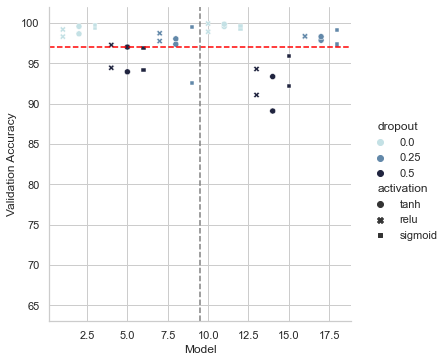

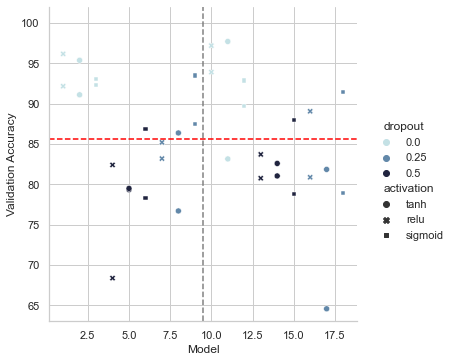

In [118]:
import seaborn as sns
sns.set_theme(style="whitegrid")

cmap = sns.cubehelix_palette(n_colors=3, rot=-.2)#, as_cmap=True)
l = sns.relplot(
    data=large_ANN.sort_values('valid_acc'),
    x="Unnamed: 1", y="valid_acc",
    hue="dropout", style = "activation", # size="mass",
    palette=cmap, sizes=(50, 200),
)
plt.ylim(63, 102)
s = sns.relplot(
    data=small_ANN.sort_values('valid_acc'),
    x="Unnamed: 1", y="valid_acc",
    hue="dropout", style = "activation", # size="mass",
    palette=cmap, sizes=(50, 200),
)

(l.map(plt.axhline, y=np.mean(large_ANN['valid_acc']), ls='--', c='red').map(plt.axvline, x=9.5, ls='--', c='grey').set_axis_labels("Model", "Validation Accuracy"))

(s.map(plt.axhline, y=np.mean(small_ANN['valid_acc']), ls='--', c='red').map(plt.axvline, x=9.5, ls='--', c='grey').set_axis_labels("Model", "Validation Accuracy"))

plt.ylim(63, 102)

In [78]:
large_ANN.sort_values('valid_acc')['valid_acc']

27    89.07
24    91.06
29    92.16
17    92.51
26    93.34
9     93.93
11    94.13
25    94.28
6     94.43
28    95.88
10    96.91
8     97.00
7     97.26
35    97.32
14    97.35
12    97.74
32    97.84
15    98.02
0     98.29
33    98.29
30    98.33
31    98.34
3     98.64
13    98.71
18    98.89
34    99.11
1     99.18
23    99.21
4     99.39
16    99.51
20    99.55
2     99.56
22    99.61
5     99.75
21    99.84
19    99.91
Name: valid_acc, dtype: float64

In [2]:
def build_NeuralNetwork():

    #input layer
    model = Sequential()
    model.add(Input(shape=(100,100,3)))
    model.add(Flatten())

    #hiddenlayer 1
    model.add(Dense(5))
    model.add(BatchNormalization())
    model.add(Activation(activation='relu'))

    #hiddenlayer 2
    model.add(Dense(50)) #900
    model.add(BatchNormalization())
    model.add(Activation(activation='relu'))
    #model.add(Dropout(0.25))

    #hiddenlayer 3
    model.add(Dense(50)) #900
    model.add(BatchNormalization())
    model.add(Activation(activation='relu'))
    #model.add(Dropout(0.25))

    #hiddenlayer 4
    #model.add(Dense(300)) #900
    #model.add(BatchNormalization())
    #model.add(Activation(activation='relu'))
    #model.add(Dropout(0.25))

    #output layer
    model.add(Dense(131,activation="softmax"))

    model.compile(loss = 'poisson', optimizer = "adam", metrics = ['accuracy'])
    print('Compiled!')

    return model

In [3]:
network = build_NeuralNetwork()
print('Model built.')
modelname = 'ann1'
checkpointer = ModelCheckpoint(filepath = modelname+'.hdf5', verbose = 0, save_best_only = True)

history = network.fit(train_images_array, train_hot_class,
    batch_size = 32, #32
    epochs = 100, #15
    validation_data = (valid_images_array, valid_hot_class),
    verbose = 2,
    callbacks=[checkpointer],
    shuffle = True)

network.save('model_'+modelname+'.h5')

train_loss, train_acc = network.evaluate(train_images_array, train_hot_class, verbose=0)
print('Restored model, train accuracy: {:5.2f}%'.format(100 * train_acc))
valid_loss, valid_acc = network.evaluate(valid_images_array, valid_hot_class, verbose=0)
print('Restored model, valid accuracy: {:5.2f}%'.format(100 * valid_acc))
new_test_loss, new_test_acc = network.evaluate(new_test_images_array, new_test_hot_class, verbose=0)
print('Restored model, new_test accuracy: {:5.2f}%'.format(100 * new_test_acc))
test_loss, test_acc = network.evaluate(test_images_array, test_hot_class, verbose=0)
print('Restored model, test accuracy: {:5.2f}%'.format(100 * test_acc))
np.save(modelname+'_history.npy',history.history)

Compiled!
Model built.
Epoch 1/100
1185/1185 - 8s - loss: 0.0280 - accuracy: 0.3019 - val_loss: 0.0212 - val_accuracy: 0.4538 - 8s/epoch - 6ms/step
Epoch 2/100
1185/1185 - 5s - loss: 0.0180 - accuracy: 0.5803 - val_loss: 0.0204 - val_accuracy: 0.4554 - 5s/epoch - 4ms/step
Epoch 3/100
1185/1185 - 5s - loss: 0.0153 - accuracy: 0.6806 - val_loss: 0.0156 - val_accuracy: 0.6460 - 5s/epoch - 4ms/step
Epoch 4/100
1185/1185 - 5s - loss: 0.0138 - accuracy: 0.7384 - val_loss: 0.0149 - val_accuracy: 0.6831 - 5s/epoch - 5ms/step
Epoch 5/100
1185/1185 - 5s - loss: 0.0131 - accuracy: 0.7664 - val_loss: 0.0114 - val_accuracy: 0.8557 - 5s/epoch - 4ms/step
Epoch 6/100
1185/1185 - 5s - loss: 0.0123 - accuracy: 0.7956 - val_loss: 0.0119 - val_accuracy: 0.8141 - 5s/epoch - 4ms/step
Epoch 7/100
1185/1185 - 5s - loss: 0.0121 - accuracy: 0.8074 - val_loss: 0.0136 - val_accuracy: 0.7293 - 5s/epoch - 4ms/step
Epoch 8/100
1185/1185 - 5s - loss: 0.0116 - accuracy: 0.8286 - val_loss: 0.0132 - val_accuracy: 0.7561

In [4]:
def build_NeuralNetwork():

    #input layer
    model = Sequential()
    model.add(Input(shape=(100,100,3)))
    model.add(Flatten())

    #hiddenlayer 1
    model.add(Dense(5))
    model.add(BatchNormalization())
    model.add(Activation(activation='tanh'))

    #hiddenlayer 2
    model.add(Dense(50)) #900
    model.add(BatchNormalization())
    model.add(Activation(activation='tanh'))
    #model.add(Dropout(0.25))

    #hiddenlayer 3
    model.add(Dense(50)) #900
    model.add(BatchNormalization())
    model.add(Activation(activation='tanh'))
    #model.add(Dropout(0.25))

    #hiddenlayer 4
    #model.add(Dense(300)) #900
    #model.add(BatchNormalization())
    #model.add(Activation(activation='relu'))
    #model.add(Dropout(0.25))

    #output layer
    model.add(Dense(131,activation="softmax"))

    model.compile(loss = 'poisson', optimizer = "adam", metrics = ['accuracy'])
    print('Compiled!')

    return model

In [5]:
network = build_NeuralNetwork()
print('Model built.')
modelname = 'ann1'
checkpointer = ModelCheckpoint(filepath = modelname+'.hdf5', verbose = 0, save_best_only = True)

history = network.fit(train_images_array, train_hot_class,
    batch_size = 32, #32
    epochs = 100, #15
    validation_data = (valid_images_array, valid_hot_class),
    verbose = 2,
    callbacks=[checkpointer],
    shuffle = True)

network.save('model_'+modelname+'.h5')

train_loss, train_acc = network.evaluate(train_images_array, train_hot_class, verbose=0)
print('Restored model, train accuracy: {:5.2f}%'.format(100 * train_acc))
valid_loss, valid_acc = network.evaluate(valid_images_array, valid_hot_class, verbose=0)
print('Restored model, valid accuracy: {:5.2f}%'.format(100 * valid_acc))
new_test_loss, new_test_acc = network.evaluate(new_test_images_array, new_test_hot_class, verbose=0)
print('Restored model, new_test accuracy: {:5.2f}%'.format(100 * new_test_acc))
test_loss, test_acc = network.evaluate(test_images_array, test_hot_class, verbose=0)
print('Restored model, test accuracy: {:5.2f}%'.format(100 * test_acc))
np.save(modelname+'_history.npy',history.history)

Compiled!
Model built.
Epoch 1/100
1185/1185 - 12s - loss: 0.0271 - accuracy: 0.4046 - val_loss: 0.0180 - val_accuracy: 0.6877 - 12s/epoch - 10ms/step
Epoch 2/100
1185/1185 - 6s - loss: 0.0171 - accuracy: 0.6622 - val_loss: 0.0152 - val_accuracy: 0.7370 - 6s/epoch - 5ms/step
Epoch 3/100
1185/1185 - 5s - loss: 0.0148 - accuracy: 0.7235 - val_loss: 0.0141 - val_accuracy: 0.7480 - 5s/epoch - 4ms/step
Epoch 4/100
1185/1185 - 5s - loss: 0.0137 - accuracy: 0.7540 - val_loss: 0.0172 - val_accuracy: 0.5936 - 5s/epoch - 4ms/step
Epoch 5/100
1185/1185 - 5s - loss: 0.0131 - accuracy: 0.7803 - val_loss: 0.0108 - val_accuracy: 0.8903 - 5s/epoch - 4ms/step
Epoch 6/100
1185/1185 - 5s - loss: 0.0127 - accuracy: 0.7927 - val_loss: 0.0117 - val_accuracy: 0.8355 - 5s/epoch - 4ms/step
Epoch 7/100
1185/1185 - 5s - loss: 0.0122 - accuracy: 0.8077 - val_loss: 0.0118 - val_accuracy: 0.8242 - 5s/epoch - 4ms/step
Epoch 8/100
1185/1185 - 5s - loss: 0.0120 - accuracy: 0.8153 - val_loss: 0.0146 - val_accuracy: 0.6

In [6]:
def build_NeuralNetwork():

    #input layer
    model = Sequential()
    model.add(Input(shape=(100,100,3)))
    model.add(Flatten())

    #hiddenlayer 1
    model.add(Dense(5))
    model.add(BatchNormalization())
    model.add(Activation(activation='sigmoid'))

    #hiddenlayer 2
    model.add(Dense(50)) #900
    model.add(BatchNormalization())
    model.add(Activation(activation='sigmoid'))
    #model.add(Dropout(0.25))

    #hiddenlayer 3
    model.add(Dense(50)) #900
    model.add(BatchNormalization())
    model.add(Activation(activation='sigmoid'))
    #model.add(Dropout(0.25))

    #hiddenlayer 4
    #model.add(Dense(300)) #900
    #model.add(BatchNormalization())
    #model.add(Activation(activation='relu'))
    #model.add(Dropout(0.25))

    #output layer
    model.add(Dense(131,activation="softmax"))

    model.compile(loss = 'poisson', optimizer = "adam", metrics = ['accuracy'])
    print('Compiled!')

    return model

In [7]:
network = build_NeuralNetwork()
print('Model built.')
modelname = 'ann1'
checkpointer = ModelCheckpoint(filepath = modelname+'.hdf5', verbose = 0, save_best_only = True)

history = network.fit(train_images_array, train_hot_class,
    batch_size = 32, #32
    epochs = 100, #15
    validation_data = (valid_images_array, valid_hot_class),
    verbose = 2,
    callbacks=[checkpointer],
    shuffle = True)

network.save('model_'+modelname+'.h5')

train_loss, train_acc = network.evaluate(train_images_array, train_hot_class, verbose=0)
print('Restored model, train accuracy: {:5.2f}%'.format(100 * train_acc))
valid_loss, valid_acc = network.evaluate(valid_images_array, valid_hot_class, verbose=0)
print('Restored model, valid accuracy: {:5.2f}%'.format(100 * valid_acc))
new_test_loss, new_test_acc = network.evaluate(new_test_images_array, new_test_hot_class, verbose=0)
print('Restored model, new_test accuracy: {:5.2f}%'.format(100 * new_test_acc))
test_loss, test_acc = network.evaluate(test_images_array, test_hot_class, verbose=0)
print('Restored model, test accuracy: {:5.2f}%'.format(100 * test_acc))
np.save(modelname+'_history.npy',history.history)

Compiled!
Model built.
Epoch 1/100
1185/1185 - 7s - loss: 0.0352 - accuracy: 0.2484 - val_loss: 0.0278 - val_accuracy: 0.3692 - 7s/epoch - 6ms/step
Epoch 2/100
1185/1185 - 5s - loss: 0.0230 - accuracy: 0.5646 - val_loss: 0.0196 - val_accuracy: 0.6869 - 5s/epoch - 4ms/step
Epoch 3/100
1185/1185 - 5s - loss: 0.0178 - accuracy: 0.7031 - val_loss: 0.0182 - val_accuracy: 0.5931 - 5s/epoch - 4ms/step
Epoch 4/100
1185/1185 - 5s - loss: 0.0153 - accuracy: 0.7574 - val_loss: 0.0143 - val_accuracy: 0.7809 - 5s/epoch - 4ms/step
Epoch 5/100
1185/1185 - 5s - loss: 0.0140 - accuracy: 0.7848 - val_loss: 0.0150 - val_accuracy: 0.6973 - 5s/epoch - 4ms/step
Epoch 6/100
1185/1185 - 5s - loss: 0.0132 - accuracy: 0.8020 - val_loss: 0.0162 - val_accuracy: 0.6263 - 5s/epoch - 4ms/step
Epoch 7/100
1185/1185 - 5s - loss: 0.0126 - accuracy: 0.8202 - val_loss: 0.0159 - val_accuracy: 0.6347 - 5s/epoch - 4ms/step
Epoch 8/100
1185/1185 - 5s - loss: 0.0123 - accuracy: 0.8244 - val_loss: 0.0111 - val_accuracy: 0.8833

In [8]:
def build_NeuralNetwork():

    #input layer
    model = Sequential()
    model.add(Input(shape=(100,100,3)))
    model.add(Flatten())

    #hiddenlayer 1
    model.add(Dense(5))
    model.add(BatchNormalization())
    model.add(Activation(activation='relu'))

    #hiddenlayer 2
    model.add(Dense(50)) #900
    model.add(BatchNormalization())
    model.add(Activation(activation='relu'))
    model.add(Dropout(0.5))

    #hiddenlayer 3
    model.add(Dense(50)) #900
    model.add(BatchNormalization())
    model.add(Activation(activation='relu'))
    model.add(Dropout(0.5))

    #hiddenlayer 4
    #model.add(Dense(300)) #900
    #model.add(BatchNormalization())
    #model.add(Activation(activation='relu'))
    #model.add(Dropout(0.25))

    #output layer
    model.add(Dense(131,activation="softmax"))

    model.compile(loss = 'poisson', optimizer = "adam", metrics = ['accuracy'])
    print('Compiled!')

    return model

In [9]:
network = build_NeuralNetwork()
print('Model built.')
modelname = 'ann1'
checkpointer = ModelCheckpoint(filepath = modelname+'.hdf5', verbose = 0, save_best_only = True)

history = network.fit(train_images_array, train_hot_class,
    batch_size = 32, #32
    epochs = 100, #15
    validation_data = (valid_images_array, valid_hot_class),
    verbose = 2,
    callbacks=[checkpointer],
    shuffle = True)

network.save('model_'+modelname+'.h5')

train_loss, train_acc = network.evaluate(train_images_array, train_hot_class, verbose=0)
print('Restored model, train accuracy: {:5.2f}%'.format(100 * train_acc))
valid_loss, valid_acc = network.evaluate(valid_images_array, valid_hot_class, verbose=0)
print('Restored model, valid accuracy: {:5.2f}%'.format(100 * valid_acc))
new_test_loss, new_test_acc = network.evaluate(new_test_images_array, new_test_hot_class, verbose=0)
print('Restored model, new_test accuracy: {:5.2f}%'.format(100 * new_test_acc))
test_loss, test_acc = network.evaluate(test_images_array, test_hot_class, verbose=0)
print('Restored model, test accuracy: {:5.2f}%'.format(100 * test_acc))
np.save(modelname+'_history.npy',history.history)

Compiled!
Model built.
Epoch 1/100
1185/1185 - 23s - loss: 0.0385 - accuracy: 0.0737 - val_loss: 0.0305 - val_accuracy: 0.2366 - 23s/epoch - 20ms/step
Epoch 2/100
1185/1185 - 6s - loss: 0.0307 - accuracy: 0.1724 - val_loss: 0.0261 - val_accuracy: 0.3130 - 6s/epoch - 5ms/step
Epoch 3/100
1185/1185 - 6s - loss: 0.0279 - accuracy: 0.2353 - val_loss: 0.0223 - val_accuracy: 0.4367 - 6s/epoch - 5ms/step
Epoch 4/100
1185/1185 - 6s - loss: 0.0264 - accuracy: 0.2777 - val_loss: 0.0210 - val_accuracy: 0.4658 - 6s/epoch - 5ms/step
Epoch 5/100
1185/1185 - 6s - loss: 0.0254 - accuracy: 0.3069 - val_loss: 0.0202 - val_accuracy: 0.5123 - 6s/epoch - 5ms/step
Epoch 6/100
1185/1185 - 6s - loss: 0.0247 - accuracy: 0.3309 - val_loss: 0.0194 - val_accuracy: 0.5083 - 6s/epoch - 5ms/step
Epoch 7/100
1185/1185 - 6s - loss: 0.0242 - accuracy: 0.3451 - val_loss: 0.0172 - val_accuracy: 0.6838 - 6s/epoch - 5ms/step
Epoch 8/100
1185/1185 - 5s - loss: 0.0238 - accuracy: 0.3576 - val_loss: 0.0215 - val_accuracy: 0.3

In [10]:
def build_NeuralNetwork():

    #input layer
    model = Sequential()
    model.add(Input(shape=(100,100,3)))
    model.add(Flatten())

    #hiddenlayer 1
    model.add(Dense(5))
    model.add(BatchNormalization())
    model.add(Activation(activation='tanh'))

    #hiddenlayer 2
    model.add(Dense(50)) #900
    model.add(BatchNormalization())
    model.add(Activation(activation='tanh'))
    model.add(Dropout(0.5))

    #hiddenlayer 3
    model.add(Dense(50)) #900
    model.add(BatchNormalization())
    model.add(Activation(activation='tanh'))
    model.add(Dropout(0.5))

    #hiddenlayer 4
    #model.add(Dense(300)) #900
    #model.add(BatchNormalization())
    #model.add(Activation(activation='relu'))
    #model.add(Dropout(0.25))

    #output layer
    model.add(Dense(131,activation="softmax"))

    model.compile(loss = 'poisson', optimizer = "adam", metrics = ['accuracy'])
    print('Compiled!')

    return model

In [11]:
network = build_NeuralNetwork()
print('Model built.')
modelname = 'ann1'
checkpointer = ModelCheckpoint(filepath = modelname+'.hdf5', verbose = 0, save_best_only = True)

history = network.fit(train_images_array, train_hot_class,
    batch_size = 32, #32
    epochs = 100, #15
    validation_data = (valid_images_array, valid_hot_class),
    verbose = 2,
    callbacks=[checkpointer],
    shuffle = True)

network.save('model_'+modelname+'.h5')

train_loss, train_acc = network.evaluate(train_images_array, train_hot_class, verbose=0)
print('Restored model, train accuracy: {:5.2f}%'.format(100 * train_acc))
valid_loss, valid_acc = network.evaluate(valid_images_array, valid_hot_class, verbose=0)
print('Restored model, valid accuracy: {:5.2f}%'.format(100 * valid_acc))
new_test_loss, new_test_acc = network.evaluate(new_test_images_array, new_test_hot_class, verbose=0)
print('Restored model, new_test accuracy: {:5.2f}%'.format(100 * new_test_acc))
test_loss, test_acc = network.evaluate(test_images_array, test_hot_class, verbose=0)
print('Restored model, test accuracy: {:5.2f}%'.format(100 * test_acc))
np.save(modelname+'_history.npy',history.history)

Compiled!
Model built.
Epoch 1/100
1185/1185 - 12s - loss: 0.0359 - accuracy: 0.1136 - val_loss: 0.0291 - val_accuracy: 0.2467 - 12s/epoch - 10ms/step
Epoch 2/100
1185/1185 - 6s - loss: 0.0272 - accuracy: 0.2859 - val_loss: 0.0220 - val_accuracy: 0.5407 - 6s/epoch - 5ms/step
Epoch 3/100
1185/1185 - 6s - loss: 0.0238 - accuracy: 0.3843 - val_loss: 0.0208 - val_accuracy: 0.5089 - 6s/epoch - 5ms/step
Epoch 4/100
1185/1185 - 5s - loss: 0.0222 - accuracy: 0.4288 - val_loss: 0.0165 - val_accuracy: 0.7183 - 5s/epoch - 5ms/step
Epoch 5/100
1185/1185 - 5s - loss: 0.0212 - accuracy: 0.4610 - val_loss: 0.0162 - val_accuracy: 0.7073 - 5s/epoch - 5ms/step
Epoch 6/100
1185/1185 - 5s - loss: 0.0208 - accuracy: 0.4730 - val_loss: 0.0198 - val_accuracy: 0.5202 - 5s/epoch - 4ms/step
Epoch 7/100
1185/1185 - 5s - loss: 0.0202 - accuracy: 0.4923 - val_loss: 0.0140 - val_accuracy: 0.8143 - 5s/epoch - 5ms/step
Epoch 8/100
1185/1185 - 5s - loss: 0.0198 - accuracy: 0.5104 - val_loss: 0.0167 - val_accuracy: 0.6

In [12]:
def build_NeuralNetwork():

    #input layer
    model = Sequential()
    model.add(Input(shape=(100,100,3)))
    model.add(Flatten())

    #hiddenlayer 1
    model.add(Dense(5))
    model.add(BatchNormalization())
    model.add(Activation(activation='sigmoid'))

    #hiddenlayer 2
    model.add(Dense(50)) #900
    model.add(BatchNormalization())
    model.add(Activation(activation='sigmoid'))
    model.add(Dropout(0.5))

    #hiddenlayer 3
    model.add(Dense(50)) #900
    model.add(BatchNormalization())
    model.add(Activation(activation='sigmoid'))
    model.add(Dropout(0.5))

    #hiddenlayer 4
    #model.add(Dense(300)) #900
    #model.add(BatchNormalization())
    #model.add(Activation(activation='relu'))
    #model.add(Dropout(0.25))

    #output layer
    model.add(Dense(131,activation="softmax"))

    model.compile(loss = 'poisson', optimizer = "adam", metrics = ['accuracy'])
    print('Compiled!')

    return model

In [13]:
network = build_NeuralNetwork()
print('Model built.')
modelname = 'ann1'
checkpointer = ModelCheckpoint(filepath = modelname+'.hdf5', verbose = 0, save_best_only = True)

history = network.fit(train_images_array, train_hot_class,
    batch_size = 32, #32
    epochs = 100, #15
    validation_data = (valid_images_array, valid_hot_class),
    verbose = 2,
    callbacks=[checkpointer],
    shuffle = True)

network.save('model_'+modelname+'.h5')

train_loss, train_acc = network.evaluate(train_images_array, train_hot_class, verbose=0)
print('Restored model, train accuracy: {:5.2f}%'.format(100 * train_acc))
valid_loss, valid_acc = network.evaluate(valid_images_array, valid_hot_class, verbose=0)
print('Restored model, valid accuracy: {:5.2f}%'.format(100 * valid_acc))
new_test_loss, new_test_acc = network.evaluate(new_test_images_array, new_test_hot_class, verbose=0)
print('Restored model, new_test accuracy: {:5.2f}%'.format(100 * new_test_acc))
test_loss, test_acc = network.evaluate(test_images_array, test_hot_class, verbose=0)
print('Restored model, test accuracy: {:5.2f}%'.format(100 * test_acc))
np.save(modelname+'_history.npy',history.history)

Compiled!
Model built.
Epoch 1/100
1185/1185 - 8s - loss: 0.0428 - accuracy: 0.0337 - val_loss: 0.0379 - val_accuracy: 0.1030 - 8s/epoch - 7ms/step
Epoch 2/100
1185/1185 - 5s - loss: 0.0364 - accuracy: 0.0967 - val_loss: 0.0309 - val_accuracy: 0.2861 - 5s/epoch - 5ms/step
Epoch 3/100
1185/1185 - 5s - loss: 0.0322 - accuracy: 0.1498 - val_loss: 0.0266 - val_accuracy: 0.4181 - 5s/epoch - 4ms/step
Epoch 4/100
1185/1185 - 5s - loss: 0.0297 - accuracy: 0.1975 - val_loss: 0.0250 - val_accuracy: 0.4219 - 5s/epoch - 4ms/step
Epoch 5/100
1185/1185 - 5s - loss: 0.0282 - accuracy: 0.2247 - val_loss: 0.0235 - val_accuracy: 0.4402 - 5s/epoch - 5ms/step
Epoch 6/100
1185/1185 - 5s - loss: 0.0271 - accuracy: 0.2487 - val_loss: 0.0214 - val_accuracy: 0.5558 - 5s/epoch - 5ms/step
Epoch 7/100
1185/1185 - 6s - loss: 0.0263 - accuracy: 0.2716 - val_loss: 0.0207 - val_accuracy: 0.6028 - 6s/epoch - 5ms/step
Epoch 8/100
1185/1185 - 5s - loss: 0.0257 - accuracy: 0.2891 - val_loss: 0.0200 - val_accuracy: 0.5842

In [14]:
def build_NeuralNetwork():

    #input layer
    model = Sequential()
    model.add(Input(shape=(100,100,3)))
    model.add(Flatten())

    #hiddenlayer 1
    model.add(Dense(5))
    model.add(BatchNormalization())
    model.add(Activation(activation='relu'))

    #hiddenlayer 2
    model.add(Dense(50)) #900
    model.add(BatchNormalization())
    model.add(Activation(activation='relu'))
    model.add(Dropout(0.25))

    #hiddenlayer 3
    model.add(Dense(50)) #900
    model.add(BatchNormalization())
    model.add(Activation(activation='relu'))
    model.add(Dropout(0.25))

    #hiddenlayer 4
    #model.add(Dense(300)) #900
    #model.add(BatchNormalization())
    #model.add(Activation(activation='relu'))
    #model.add(Dropout(0.25))

    #output layer
    model.add(Dense(131,activation="softmax"))

    model.compile(loss = 'poisson', optimizer = "adam", metrics = ['accuracy'])
    print('Compiled!')

    return model

In [15]:
network = build_NeuralNetwork()
print('Model built.')
modelname = 'ann1'
checkpointer = ModelCheckpoint(filepath = modelname+'.hdf5', verbose = 0, save_best_only = True)

history = network.fit(train_images_array, train_hot_class,
    batch_size = 32, #32
    epochs = 100, #15
    validation_data = (valid_images_array, valid_hot_class),
    verbose = 2,
    callbacks=[checkpointer],
    shuffle = True)

network.save('model_'+modelname+'.h5')

train_loss, train_acc = network.evaluate(train_images_array, train_hot_class, verbose=0)
print('Restored model, train accuracy: {:5.2f}%'.format(100 * train_acc))
valid_loss, valid_acc = network.evaluate(valid_images_array, valid_hot_class, verbose=0)
print('Restored model, valid accuracy: {:5.2f}%'.format(100 * valid_acc))
new_test_loss, new_test_acc = network.evaluate(new_test_images_array, new_test_hot_class, verbose=0)
print('Restored model, new_test accuracy: {:5.2f}%'.format(100 * new_test_acc))
test_loss, test_acc = network.evaluate(test_images_array, test_hot_class, verbose=0)
print('Restored model, test accuracy: {:5.2f}%'.format(100 * test_acc))
np.save(modelname+'_history.npy',history.history)

Compiled!
Model built.
Epoch 1/100
1185/1185 - 12s - loss: 0.0328 - accuracy: 0.1596 - val_loss: 0.0235 - val_accuracy: 0.4014 - 12s/epoch - 10ms/step
Epoch 2/100
1185/1185 - 6s - loss: 0.0242 - accuracy: 0.3453 - val_loss: 0.0200 - val_accuracy: 0.5208 - 6s/epoch - 5ms/step
Epoch 3/100
1185/1185 - 5s - loss: 0.0216 - accuracy: 0.4358 - val_loss: 0.0238 - val_accuracy: 0.3833 - 5s/epoch - 5ms/step
Epoch 4/100
1185/1185 - 5s - loss: 0.0197 - accuracy: 0.5028 - val_loss: 0.0178 - val_accuracy: 0.5689 - 5s/epoch - 5ms/step
Epoch 5/100
1185/1185 - 6s - loss: 0.0187 - accuracy: 0.5442 - val_loss: 0.0138 - val_accuracy: 0.7834 - 6s/epoch - 5ms/step
Epoch 6/100
1185/1185 - 6s - loss: 0.0181 - accuracy: 0.5680 - val_loss: 0.0127 - val_accuracy: 0.8305 - 6s/epoch - 5ms/step
Epoch 7/100
1185/1185 - 5s - loss: 0.0176 - accuracy: 0.5856 - val_loss: 0.0126 - val_accuracy: 0.8192 - 5s/epoch - 5ms/step
Epoch 8/100
1185/1185 - 5s - loss: 0.0172 - accuracy: 0.5981 - val_loss: 0.0140 - val_accuracy: 0.7

In [16]:
def build_NeuralNetwork():

    #input layer
    model = Sequential()
    model.add(Input(shape=(100,100,3)))
    model.add(Flatten())

    #hiddenlayer 1
    model.add(Dense(5))
    model.add(BatchNormalization())
    model.add(Activation(activation='tanh'))

    #hiddenlayer 2
    model.add(Dense(50)) #900
    model.add(BatchNormalization())
    model.add(Activation(activation='tanh'))
    model.add(Dropout(0.25))

    #hiddenlayer 3
    model.add(Dense(50)) #900
    model.add(BatchNormalization())
    model.add(Activation(activation='tanh'))
    model.add(Dropout(0.25))

    #hiddenlayer 4
    #model.add(Dense(300)) #900
    #model.add(BatchNormalization())
    #model.add(Activation(activation='relu'))
    #model.add(Dropout(0.25))

    #output layer
    model.add(Dense(131,activation="softmax"))

    model.compile(loss = 'poisson', optimizer = "adam", metrics = ['accuracy'])
    print('Compiled!')

    return model

In [17]:
network = build_NeuralNetwork()
print('Model built.')
modelname = 'ann1'
checkpointer = ModelCheckpoint(filepath = modelname+'.hdf5', verbose = 0, save_best_only = True)

history = network.fit(train_images_array, train_hot_class,
    batch_size = 32, #32
    epochs = 100, #15
    validation_data = (valid_images_array, valid_hot_class),
    verbose = 2,
    callbacks=[checkpointer],
    shuffle = True)

network.save('model_'+modelname+'.h5')

train_loss, train_acc = network.evaluate(train_images_array, train_hot_class, verbose=0)
print('Restored model, train accuracy: {:5.2f}%'.format(100 * train_acc))
valid_loss, valid_acc = network.evaluate(valid_images_array, valid_hot_class, verbose=0)
print('Restored model, valid accuracy: {:5.2f}%'.format(100 * valid_acc))
new_test_loss, new_test_acc = network.evaluate(new_test_images_array, new_test_hot_class, verbose=0)
print('Restored model, new_test accuracy: {:5.2f}%'.format(100 * new_test_acc))
test_loss, test_acc = network.evaluate(test_images_array, test_hot_class, verbose=0)
print('Restored model, test accuracy: {:5.2f}%'.format(100 * test_acc))
np.save(modelname+'_history.npy',history.history)

Compiled!
Model built.
Epoch 1/100
1185/1185 - 9s - loss: 0.0310 - accuracy: 0.2620 - val_loss: 0.0219 - val_accuracy: 0.5722 - 9s/epoch - 8ms/step
Epoch 2/100
1185/1185 - 5s - loss: 0.0211 - accuracy: 0.5142 - val_loss: 0.0198 - val_accuracy: 0.5227 - 5s/epoch - 5ms/step
Epoch 3/100
1185/1185 - 6s - loss: 0.0183 - accuracy: 0.5906 - val_loss: 0.0172 - val_accuracy: 0.6074 - 6s/epoch - 5ms/step
Epoch 4/100
1185/1185 - 5s - loss: 0.0171 - accuracy: 0.6258 - val_loss: 0.0136 - val_accuracy: 0.7950 - 5s/epoch - 5ms/step
Epoch 5/100
1185/1185 - 5s - loss: 0.0165 - accuracy: 0.6425 - val_loss: 0.0174 - val_accuracy: 0.5785 - 5s/epoch - 4ms/step
Epoch 6/100
1185/1185 - 5s - loss: 0.0161 - accuracy: 0.6514 - val_loss: 0.0120 - val_accuracy: 0.8484 - 5s/epoch - 4ms/step
Epoch 7/100
1185/1185 - 5s - loss: 0.0156 - accuracy: 0.6710 - val_loss: 0.0130 - val_accuracy: 0.7864 - 5s/epoch - 4ms/step
Epoch 8/100
1185/1185 - 5s - loss: 0.0154 - accuracy: 0.6796 - val_loss: 0.0159 - val_accuracy: 0.6389

In [18]:
def build_NeuralNetwork():

    #input layer
    model = Sequential()
    model.add(Input(shape=(100,100,3)))
    model.add(Flatten())

    #hiddenlayer 1
    model.add(Dense(5))
    model.add(BatchNormalization())
    model.add(Activation(activation='sigmoid'))

    #hiddenlayer 2
    model.add(Dense(50)) #900
    model.add(BatchNormalization())
    model.add(Activation(activation='sigmoid'))
    model.add(Dropout(0.25))

    #hiddenlayer 3
    model.add(Dense(50)) #900
    model.add(BatchNormalization())
    model.add(Activation(activation='sigmoid'))
    model.add(Dropout(0.25))

    #hiddenlayer 4
    #model.add(Dense(300)) #900
    #model.add(BatchNormalization())
    #model.add(Activation(activation='relu'))
    #model.add(Dropout(0.25))

    #output layer
    model.add(Dense(131,activation="softmax"))

    model.compile(loss = 'poisson', optimizer = "adam", metrics = ['accuracy'])
    print('Compiled!')

    return model

In [19]:
network = build_NeuralNetwork()
print('Model built.')
modelname = 'ann1'
checkpointer = ModelCheckpoint(filepath = modelname+'.hdf5', verbose = 0, save_best_only = True)

history = network.fit(train_images_array, train_hot_class,
    batch_size = 32, #32
    epochs = 100, #15
    validation_data = (valid_images_array, valid_hot_class),
    verbose = 2,
    callbacks=[checkpointer],
    shuffle = True)

network.save('model_'+modelname+'.h5')

train_loss, train_acc = network.evaluate(train_images_array, train_hot_class, verbose=0)
print('Restored model, train accuracy: {:5.2f}%'.format(100 * train_acc))
valid_loss, valid_acc = network.evaluate(valid_images_array, valid_hot_class, verbose=0)
print('Restored model, valid accuracy: {:5.2f}%'.format(100 * valid_acc))
new_test_loss, new_test_acc = network.evaluate(new_test_images_array, new_test_hot_class, verbose=0)
print('Restored model, new_test accuracy: {:5.2f}%'.format(100 * new_test_acc))
test_loss, test_acc = network.evaluate(test_images_array, test_hot_class, verbose=0)
print('Restored model, test accuracy: {:5.2f}%'.format(100 * test_acc))
np.save(modelname+'_history.npy',history.history)

Compiled!
Model built.
Epoch 1/100
1185/1185 - 9s - loss: 0.0399 - accuracy: 0.0733 - val_loss: 0.0360 - val_accuracy: 0.0956 - 9s/epoch - 8ms/step
Epoch 2/100
1185/1185 - 5s - loss: 0.0312 - accuracy: 0.2245 - val_loss: 0.0276 - val_accuracy: 0.2932 - 5s/epoch - 5ms/step
Epoch 3/100
1185/1185 - 6s - loss: 0.0261 - accuracy: 0.3448 - val_loss: 0.0217 - val_accuracy: 0.5902 - 6s/epoch - 5ms/step
Epoch 4/100
1185/1185 - 6s - loss: 0.0231 - accuracy: 0.4283 - val_loss: 0.0195 - val_accuracy: 0.6176 - 6s/epoch - 5ms/step
Epoch 5/100
1185/1185 - 5s - loss: 0.0211 - accuracy: 0.4890 - val_loss: 0.0273 - val_accuracy: 0.2688 - 5s/epoch - 5ms/step
Epoch 6/100
1185/1185 - 6s - loss: 0.0199 - accuracy: 0.5285 - val_loss: 0.0166 - val_accuracy: 0.6859 - 6s/epoch - 5ms/step
Epoch 7/100
1185/1185 - 5s - loss: 0.0190 - accuracy: 0.5574 - val_loss: 0.0157 - val_accuracy: 0.7210 - 5s/epoch - 5ms/step
Epoch 8/100
1185/1185 - 5s - loss: 0.0183 - accuracy: 0.5795 - val_loss: 0.0163 - val_accuracy: 0.6780

In [ ]:
train_hot_class = np_utils.to_categorical(intclass_train, n_classes)
test_hot_class = np_utils.to_categorical(intclass_test, n_classes)

train_images_array = np.array(convert_image_to_array(names_train))
test_images_array = np.array(convert_image_to_array(names_test))

train_images_array = train_images_array.astype('float32')/255
test_images_array = test_images_array.astype('float32')/255

from sklearn.model_selection import train_test_split
#split training into another training and test (to reduce computation resources/time)
train_images_array, new_test_images_array, train_hot_class, new_test_hot_class = train_test_split(train_images_array, train_hot_class, test_size = 0.3, random_state = 42)

train_images_array, valid_images_array, train_hot_class, valid_hot_class = train_test_split(train_images_array, train_hot_class, test_size = 0.2)

In [ ]:
def build_NeuralNetwork():

    #input layer
    model = Sequential()
    model.add(Input(shape=(100,100,3)))
    model.add(Flatten())

    #hiddenlayer 1
    model.add(Dense(5))
    model.add(BatchNormalization())
    model.add(Activation(activation='relu'))

    #hiddenlayer 2
    model.add(Dense(50)) #900
    model.add(BatchNormalization())
    model.add(Activation(activation='relu'))
    #model.add(Dropout(0.25))

    #hiddenlayer 3
    model.add(Dense(50)) #900
    model.add(BatchNormalization())
    model.add(Activation(activation='relu'))
    #model.add(Dropout(0.25))

    #hiddenlayer 4
    #model.add(Dense(300)) #900
    #model.add(BatchNormalization())
    #model.add(Activation(activation='relu'))
    #model.add(Dropout(0.25))

    #output layer
    model.add(Dense(131,activation="softmax"))

    model.compile(loss = 'poisson', optimizer = "adam", metrics = ['accuracy'])
    print('Compiled!')

    return model

In [ ]:
network = build_NeuralNetwork()
print('Model built.')
modelname = 'ann1'
checkpointer = ModelCheckpoint(filepath = modelname+'.hdf5', verbose = 0, save_best_only = True)

history = network.fit(train_images_array, train_hot_class,
    batch_size = 32, #32
    epochs = 100, #15
    validation_data = (valid_images_array, valid_hot_class),
    verbose = 2,
    callbacks=[checkpointer],
    shuffle = True)

network.save('model_'+modelname+'.h5')

train_loss, train_acc = network.evaluate(train_images_array, train_hot_class, verbose=0)
print('Restored model, train accuracy: {:5.2f}%'.format(100 * train_acc))
valid_loss, valid_acc = network.evaluate(valid_images_array, valid_hot_class, verbose=0)
print('Restored model, valid accuracy: {:5.2f}%'.format(100 * valid_acc))
new_test_loss, new_test_acc = network.evaluate(new_test_images_array, new_test_hot_class, verbose=0)
print('Restored model, new_test accuracy: {:5.2f}%'.format(100 * new_test_acc))
test_loss, test_acc = network.evaluate(test_images_array, test_hot_class, verbose=0)
print('Restored model, test accuracy: {:5.2f}%'.format(100 * test_acc))
np.save(modelname+'_history.npy',history.history)

In [ ]:
def build_NeuralNetwork():

    #input layer
    model = Sequential()
    model.add(Input(shape=(100,100,3)))
    model.add(Flatten())

    #hiddenlayer 1
    model.add(Dense(5))
    model.add(BatchNormalization())
    model.add(Activation(activation='tanh'))

    #hiddenlayer 2
    model.add(Dense(50)) #900
    model.add(BatchNormalization())
    model.add(Activation(activation='tanh'))
    #model.add(Dropout(0.25))

    #hiddenlayer 3
    model.add(Dense(50)) #900
    model.add(BatchNormalization())
    model.add(Activation(activation='tanh'))
    #model.add(Dropout(0.25))

    #hiddenlayer 4
    #model.add(Dense(300)) #900
    #model.add(BatchNormalization())
    #model.add(Activation(activation='relu'))
    #model.add(Dropout(0.25))

    #output layer
    model.add(Dense(131,activation="softmax"))

    model.compile(loss = 'poisson', optimizer = "adam", metrics = ['accuracy'])
    print('Compiled!')

    return model

In [ ]:
network = build_NeuralNetwork()
print('Model built.')
modelname = 'ann1'
checkpointer = ModelCheckpoint(filepath = modelname+'.hdf5', verbose = 0, save_best_only = True)

history = network.fit(train_images_array, train_hot_class,
    batch_size = 32, #32
    epochs = 100, #15
    validation_data = (valid_images_array, valid_hot_class),
    verbose = 2,
    callbacks=[checkpointer],
    shuffle = True)

network.save('model_'+modelname+'.h5')

train_loss, train_acc = network.evaluate(train_images_array, train_hot_class, verbose=0)
print('Restored model, train accuracy: {:5.2f}%'.format(100 * train_acc))
valid_loss, valid_acc = network.evaluate(valid_images_array, valid_hot_class, verbose=0)
print('Restored model, valid accuracy: {:5.2f}%'.format(100 * valid_acc))
new_test_loss, new_test_acc = network.evaluate(new_test_images_array, new_test_hot_class, verbose=0)
print('Restored model, new_test accuracy: {:5.2f}%'.format(100 * new_test_acc))
test_loss, test_acc = network.evaluate(test_images_array, test_hot_class, verbose=0)
print('Restored model, test accuracy: {:5.2f}%'.format(100 * test_acc))
np.save(modelname+'_history.npy',history.history)

In [ ]:
def build_NeuralNetwork():

    #input layer
    model = Sequential()
    model.add(Input(shape=(100,100,3)))
    model.add(Flatten())

    #hiddenlayer 1
    model.add(Dense(5))
    model.add(BatchNormalization())
    model.add(Activation(activation='sigmoid'))

    #hiddenlayer 2
    model.add(Dense(50)) #900
    model.add(BatchNormalization())
    model.add(Activation(activation='sigmoid'))
    #model.add(Dropout(0.25))

    #hiddenlayer 3
    model.add(Dense(50)) #900
    model.add(BatchNormalization())
    model.add(Activation(activation='sigmoid'))
    #model.add(Dropout(0.25))

    #hiddenlayer 4
    #model.add(Dense(300)) #900
    #model.add(BatchNormalization())
    #model.add(Activation(activation='relu'))
    #model.add(Dropout(0.25))

    #output layer
    model.add(Dense(131,activation="softmax"))

    model.compile(loss = 'poisson', optimizer = "adam", metrics = ['accuracy'])
    print('Compiled!')

    return model

In [ ]:
network = build_NeuralNetwork()
print('Model built.')
modelname = 'ann1'
checkpointer = ModelCheckpoint(filepath = modelname+'.hdf5', verbose = 0, save_best_only = True)

history = network.fit(train_images_array, train_hot_class,
    batch_size = 32, #32
    epochs = 100, #15
    validation_data = (valid_images_array, valid_hot_class),
    verbose = 2,
    callbacks=[checkpointer],
    shuffle = True)

network.save('model_'+modelname+'.h5')

train_loss, train_acc = network.evaluate(train_images_array, train_hot_class, verbose=0)
print('Restored model, train accuracy: {:5.2f}%'.format(100 * train_acc))
valid_loss, valid_acc = network.evaluate(valid_images_array, valid_hot_class, verbose=0)
print('Restored model, valid accuracy: {:5.2f}%'.format(100 * valid_acc))
new_test_loss, new_test_acc = network.evaluate(new_test_images_array, new_test_hot_class, verbose=0)
print('Restored model, new_test accuracy: {:5.2f}%'.format(100 * new_test_acc))
test_loss, test_acc = network.evaluate(test_images_array, test_hot_class, verbose=0)
print('Restored model, test accuracy: {:5.2f}%'.format(100 * test_acc))
np.save(modelname+'_history.npy',history.history)

In [ ]:
def build_NeuralNetwork():

    #input layer
    model = Sequential()
    model.add(Input(shape=(100,100,3)))
    model.add(Flatten())

    #hiddenlayer 1
    model.add(Dense(5))
    model.add(BatchNormalization())
    model.add(Activation(activation='relu'))

    #hiddenlayer 2
    model.add(Dense(50)) #900
    model.add(BatchNormalization())
    model.add(Activation(activation='relu'))
    model.add(Dropout(0.5))

    #hiddenlayer 3
    model.add(Dense(50)) #900
    model.add(BatchNormalization())
    model.add(Activation(activation='relu'))
    model.add(Dropout(0.5))

    #hiddenlayer 4
    #model.add(Dense(300)) #900
    #model.add(BatchNormalization())
    #model.add(Activation(activation='relu'))
    #model.add(Dropout(0.25))

    #output layer
    model.add(Dense(131,activation="softmax"))

    model.compile(loss = 'poisson', optimizer = "adam", metrics = ['accuracy'])
    print('Compiled!')

    return model

In [ ]:
network = build_NeuralNetwork()
print('Model built.')
modelname = 'ann1'
checkpointer = ModelCheckpoint(filepath = modelname+'.hdf5', verbose = 0, save_best_only = True)

history = network.fit(train_images_array, train_hot_class,
    batch_size = 32, #32
    epochs = 100, #15
    validation_data = (valid_images_array, valid_hot_class),
    verbose = 2,
    callbacks=[checkpointer],
    shuffle = True)

network.save('model_'+modelname+'.h5')

train_loss, train_acc = network.evaluate(train_images_array, train_hot_class, verbose=0)
print('Restored model, train accuracy: {:5.2f}%'.format(100 * train_acc))
valid_loss, valid_acc = network.evaluate(valid_images_array, valid_hot_class, verbose=0)
print('Restored model, valid accuracy: {:5.2f}%'.format(100 * valid_acc))
new_test_loss, new_test_acc = network.evaluate(new_test_images_array, new_test_hot_class, verbose=0)
print('Restored model, new_test accuracy: {:5.2f}%'.format(100 * new_test_acc))
test_loss, test_acc = network.evaluate(test_images_array, test_hot_class, verbose=0)
print('Restored model, test accuracy: {:5.2f}%'.format(100 * test_acc))
np.save(modelname+'_history.npy',history.history)

In [ ]:
def build_NeuralNetwork():

    #input layer
    model = Sequential()
    model.add(Input(shape=(100,100,3)))
    model.add(Flatten())

    #hiddenlayer 1
    model.add(Dense(5))
    model.add(BatchNormalization())
    model.add(Activation(activation='tanh'))

    #hiddenlayer 2
    model.add(Dense(50)) #900
    model.add(BatchNormalization())
    model.add(Activation(activation='tanh'))
    model.add(Dropout(0.5))

    #hiddenlayer 3
    model.add(Dense(50)) #900
    model.add(BatchNormalization())
    model.add(Activation(activation='tanh'))
    model.add(Dropout(0.5))

    #hiddenlayer 4
    #model.add(Dense(300)) #900
    #model.add(BatchNormalization())
    #model.add(Activation(activation='relu'))
    #model.add(Dropout(0.25))

    #output layer
    model.add(Dense(131,activation="softmax"))

    model.compile(loss = 'poisson', optimizer = "adam", metrics = ['accuracy'])
    print('Compiled!')

    return model

In [ ]:
network = build_NeuralNetwork()
print('Model built.')
modelname = 'ann1'
checkpointer = ModelCheckpoint(filepath = modelname+'.hdf5', verbose = 0, save_best_only = True)

history = network.fit(train_images_array, train_hot_class,
    batch_size = 32, #32
    epochs = 100, #15
    validation_data = (valid_images_array, valid_hot_class),
    verbose = 2,
    callbacks=[checkpointer],
    shuffle = True)

network.save('model_'+modelname+'.h5')

train_loss, train_acc = network.evaluate(train_images_array, train_hot_class, verbose=0)
print('Restored model, train accuracy: {:5.2f}%'.format(100 * train_acc))
valid_loss, valid_acc = network.evaluate(valid_images_array, valid_hot_class, verbose=0)
print('Restored model, valid accuracy: {:5.2f}%'.format(100 * valid_acc))
new_test_loss, new_test_acc = network.evaluate(new_test_images_array, new_test_hot_class, verbose=0)
print('Restored model, new_test accuracy: {:5.2f}%'.format(100 * new_test_acc))
test_loss, test_acc = network.evaluate(test_images_array, test_hot_class, verbose=0)
print('Restored model, test accuracy: {:5.2f}%'.format(100 * test_acc))
np.save(modelname+'_history.npy',history.history)

In [ ]:
def build_NeuralNetwork():

    #input layer
    model = Sequential()
    model.add(Input(shape=(100,100,3)))
    model.add(Flatten())

    #hiddenlayer 1
    model.add(Dense(5))
    model.add(BatchNormalization())
    model.add(Activation(activation='sigmoid'))

    #hiddenlayer 2
    model.add(Dense(50)) #900
    model.add(BatchNormalization())
    model.add(Activation(activation='sigmoid'))
    model.add(Dropout(0.5))

    #hiddenlayer 3
    model.add(Dense(50)) #900
    model.add(BatchNormalization())
    model.add(Activation(activation='sigmoid'))
    model.add(Dropout(0.5))

    #hiddenlayer 4
    #model.add(Dense(300)) #900
    #model.add(BatchNormalization())
    #model.add(Activation(activation='relu'))
    #model.add(Dropout(0.25))

    #output layer
    model.add(Dense(131,activation="softmax"))

    model.compile(loss = 'poisson', optimizer = "adam", metrics = ['accuracy'])
    print('Compiled!')

    return model

In [ ]:
network = build_NeuralNetwork()
print('Model built.')
modelname = 'ann1'
checkpointer = ModelCheckpoint(filepath = modelname+'.hdf5', verbose = 0, save_best_only = True)

history = network.fit(train_images_array, train_hot_class,
    batch_size = 32, #32
    epochs = 100, #15
    validation_data = (valid_images_array, valid_hot_class),
    verbose = 2,
    callbacks=[checkpointer],
    shuffle = True)

network.save('model_'+modelname+'.h5')

train_loss, train_acc = network.evaluate(train_images_array, train_hot_class, verbose=0)
print('Restored model, train accuracy: {:5.2f}%'.format(100 * train_acc))
valid_loss, valid_acc = network.evaluate(valid_images_array, valid_hot_class, verbose=0)
print('Restored model, valid accuracy: {:5.2f}%'.format(100 * valid_acc))
new_test_loss, new_test_acc = network.evaluate(new_test_images_array, new_test_hot_class, verbose=0)
print('Restored model, new_test accuracy: {:5.2f}%'.format(100 * new_test_acc))
test_loss, test_acc = network.evaluate(test_images_array, test_hot_class, verbose=0)
print('Restored model, test accuracy: {:5.2f}%'.format(100 * test_acc))
np.save(modelname+'_history.npy',history.history)

In [ ]:
def build_NeuralNetwork():

    #input layer
    model = Sequential()
    model.add(Input(shape=(100,100,3)))
    model.add(Flatten())

    #hiddenlayer 1
    model.add(Dense(5))
    model.add(BatchNormalization())
    model.add(Activation(activation='relu'))

    #hiddenlayer 2
    model.add(Dense(50)) #900
    model.add(BatchNormalization())
    model.add(Activation(activation='relu'))
    model.add(Dropout(0.25))

    #hiddenlayer 3
    model.add(Dense(50)) #900
    model.add(BatchNormalization())
    model.add(Activation(activation='relu'))
    model.add(Dropout(0.25))

    #hiddenlayer 4
    #model.add(Dense(300)) #900
    #model.add(BatchNormalization())
    #model.add(Activation(activation='relu'))
    #model.add(Dropout(0.25))

    #output layer
    model.add(Dense(131,activation="softmax"))

    model.compile(loss = 'poisson', optimizer = "adam", metrics = ['accuracy'])
    print('Compiled!')

    return model

In [ ]:
network = build_NeuralNetwork()
print('Model built.')
modelname = 'ann1'
checkpointer = ModelCheckpoint(filepath = modelname+'.hdf5', verbose = 0, save_best_only = True)

history = network.fit(train_images_array, train_hot_class,
    batch_size = 32, #32
    epochs = 100, #15
    validation_data = (valid_images_array, valid_hot_class),
    verbose = 2,
    callbacks=[checkpointer],
    shuffle = True)

network.save('model_'+modelname+'.h5')

train_loss, train_acc = network.evaluate(train_images_array, train_hot_class, verbose=0)
print('Restored model, train accuracy: {:5.2f}%'.format(100 * train_acc))
valid_loss, valid_acc = network.evaluate(valid_images_array, valid_hot_class, verbose=0)
print('Restored model, valid accuracy: {:5.2f}%'.format(100 * valid_acc))
new_test_loss, new_test_acc = network.evaluate(new_test_images_array, new_test_hot_class, verbose=0)
print('Restored model, new_test accuracy: {:5.2f}%'.format(100 * new_test_acc))
test_loss, test_acc = network.evaluate(test_images_array, test_hot_class, verbose=0)
print('Restored model, test accuracy: {:5.2f}%'.format(100 * test_acc))
np.save(modelname+'_history.npy',history.history)

In [ ]:
def build_NeuralNetwork():

    #input layer
    model = Sequential()
    model.add(Input(shape=(100,100,3)))
    model.add(Flatten())

    #hiddenlayer 1
    model.add(Dense(5))
    model.add(BatchNormalization())
    model.add(Activation(activation='tanh'))

    #hiddenlayer 2
    model.add(Dense(50)) #900
    model.add(BatchNormalization())
    model.add(Activation(activation='tanh'))
    model.add(Dropout(0.25))

    #hiddenlayer 3
    model.add(Dense(50)) #900
    model.add(BatchNormalization())
    model.add(Activation(activation='tanh'))
    model.add(Dropout(0.25))

    #hiddenlayer 4
    #model.add(Dense(300)) #900
    #model.add(BatchNormalization())
    #model.add(Activation(activation='relu'))
    #model.add(Dropout(0.25))

    #output layer
    model.add(Dense(131,activation="softmax"))

    model.compile(loss = 'poisson', optimizer = "adam", metrics = ['accuracy'])
    print('Compiled!')

    return model

In [ ]:
network = build_NeuralNetwork()
print('Model built.')
modelname = 'ann1'
checkpointer = ModelCheckpoint(filepath = modelname+'.hdf5', verbose = 0, save_best_only = True)

history = network.fit(train_images_array, train_hot_class,
    batch_size = 32, #32
    epochs = 100, #15
    validation_data = (valid_images_array, valid_hot_class),
    verbose = 2,
    callbacks=[checkpointer],
    shuffle = True)

network.save('model_'+modelname+'.h5')

train_loss, train_acc = network.evaluate(train_images_array, train_hot_class, verbose=0)
print('Restored model, train accuracy: {:5.2f}%'.format(100 * train_acc))
valid_loss, valid_acc = network.evaluate(valid_images_array, valid_hot_class, verbose=0)
print('Restored model, valid accuracy: {:5.2f}%'.format(100 * valid_acc))
new_test_loss, new_test_acc = network.evaluate(new_test_images_array, new_test_hot_class, verbose=0)
print('Restored model, new_test accuracy: {:5.2f}%'.format(100 * new_test_acc))
test_loss, test_acc = network.evaluate(test_images_array, test_hot_class, verbose=0)
print('Restored model, test accuracy: {:5.2f}%'.format(100 * test_acc))
np.save(modelname+'_history.npy',history.history)

In [ ]:
def build_NeuralNetwork():

    #input layer
    model = Sequential()
    model.add(Input(shape=(100,100,3)))
    model.add(Flatten())

    #hiddenlayer 1
    model.add(Dense(5))
    model.add(BatchNormalization())
    model.add(Activation(activation='sigmoid'))

    #hiddenlayer 2
    model.add(Dense(50)) #900
    model.add(BatchNormalization())
    model.add(Activation(activation='sigmoid'))
    model.add(Dropout(0.25))

    #hiddenlayer 3
    model.add(Dense(50)) #900
    model.add(BatchNormalization())
    model.add(Activation(activation='sigmoid'))
    model.add(Dropout(0.25))

    #hiddenlayer 4
    #model.add(Dense(300)) #900
    #model.add(BatchNormalization())
    #model.add(Activation(activation='relu'))
    #model.add(Dropout(0.25))

    #output layer
    model.add(Dense(131,activation="softmax"))

    model.compile(loss = 'poisson', optimizer = "adam", metrics = ['accuracy'])
    print('Compiled!')

    return model

In [ ]:
network = build_NeuralNetwork()
print('Model built.')
modelname = 'ann1'
checkpointer = ModelCheckpoint(filepath = modelname+'.hdf5', verbose = 0, save_best_only = True)

history = network.fit(train_images_array, train_hot_class,
    batch_size = 32, #32
    epochs = 100, #15
    validation_data = (valid_images_array, valid_hot_class),
    verbose = 2,
    callbacks=[checkpointer],
    shuffle = True)

network.save('model_'+modelname+'.h5')

train_loss, train_acc = network.evaluate(train_images_array, train_hot_class, verbose=0)
print('Restored model, train accuracy: {:5.2f}%'.format(100 * train_acc))
valid_loss, valid_acc = network.evaluate(valid_images_array, valid_hot_class, verbose=0)
print('Restored model, valid accuracy: {:5.2f}%'.format(100 * valid_acc))
new_test_loss, new_test_acc = network.evaluate(new_test_images_array, new_test_hot_class, verbose=0)
print('Restored model, new_test accuracy: {:5.2f}%'.format(100 * new_test_acc))
test_loss, test_acc = network.evaluate(test_images_array, test_hot_class, verbose=0)
print('Restored model, test accuracy: {:5.2f}%'.format(100 * test_acc))
np.save(modelname+'_history.npy',history.history)

In [ ]:

history2=np.load('my_history.npy',allow_pickle='TRUE').item()


In [ ]:
plt.plot(history2['accuracy'])

In [ ]:
new_model = tf.keras.models.load_model('model_ann1.h5')
new_model.summary()

Model accuracy

In [ ]:
plt.figure(figsize = (6, 5))
plt.plot(history.history['accuracy'], color = 'r')
plt.plot(history.history['val_accuracy'], color = 'b')
plt.title('Model Accuracy', weight = 'bold', fontsize = 16)
plt.ylabel('accuracy', weight = 'bold', fontsize = 14)
plt.xlabel('epoch', weight = 'bold', fontsize = 14)
plt.ylim(0.6, 1.1)
plt.xticks(weight = 'bold', fontsize = 12)
plt.yticks(weight = 'bold', fontsize = 12)
plt.legend(['train', 'val'], loc = 'lower right', prop = {'size': 14})
plt.grid(color = 'y', linewidth = '0.5')
plt.show()

Show prediction.

In [ ]:
import matplotlib.pyplot as plt 
plt.figure(1)  
   
 # summarize history for accuracy  
   
plt.subplot(211)  
plt.plot(history.history['accuracy'])  
plt.plot(history.history['val_accuracy'])  
plt.title('model accuracy')  
plt.ylabel('accuracy')  
plt.xlabel('epoch')  
plt.legend(['train', 'validation'], loc = 'lower right')
   
 # summarize history for loss  
   
plt.subplot(212)  
plt.plot(history.history['loss'])  
plt.plot(history.history['val_loss'])  
plt.title('model loss')  
plt.ylabel('loss')  
plt.xlabel('epoch')  
plt.legend(['train', 'validation'], loc = 'upper right')
plt.show()